 Auto Insurance Fraud Detection - Exploratory Data Analysis ,Feature Engineering and Model Building

**Introduction**

With this project I'll be performing exploratory data analysis and machine learning on three years of vehicle accident claim data for a vehicle insurance company. The goal of this analysis is to create an algorithm for detecting fraud in future vehicle accident claims.

Detecting fraud is notoriously difficult, since it represents such a small percent of cases, and it is specifically meant to go undetected. Our first goal is to determine which variables are most correlated with vehicle claim fraud, and use that as a baseline for building our machine learning algorithm.

**Vehicle Insurance Fraud Detection**

Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated.

**Data Description**


This data was provided by Shivam Bansal, from a public domain source. It is a collection of insurance claims. There are approximately 14.5 thousand subjects, 923 of which are marked as fraudulent. Before we dive into analysis, we need to perform some basic data cleaning steps, and prepare the data for analysis.

This dataset contains vehicle dataset - attribute, model, accident details, etc along with policy details - policy type, tenure etc. The target is to detect if a claim application is fraudulent or not - FraudFound_P

Kaggle URL to Download Dataset: https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection?select=fraud_oracle.csv

In [2]:
#pip install scikit-learn

In [3]:
# importing modules

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
from sklearn.pipeline import Pipeline, make_pipeline

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
le = LabelEncoder()
oh = OneHotEncoder()
scaler = StandardScaler()

In [6]:
df = pd.read_csv(r"fraud_oracle.csv")

In [7]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [9]:
df.describe()

WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean    7710.500000      8.483268    407.704280      2.487808   1994.866472  
std     4451.514911      4.599948     43.950998      1.119453      0.803313  
min        1.000000      1.000000    300.000000      1.000000   1994.000000  
25%     3855.750000      5.000000    400.000000      1.000000   1994.000000  
50%     7710.500000      8.000000    400.000000      2.000000   1995.000000  
75%    11565.250000     12.000000    400.000000      3.000000   1996.000000  
max    15420.000000     16.000000    700.000000      4.000000   1996.000000

In [10]:
df.shape

(15420, 33)

In [11]:
df.memory_usage()

Index                      128
Month                   123360
WeekOfMonth             123360
DayOfWeek               123360
Make                    123360
AccidentArea            123360
DayOfWeekClaimed        123360
MonthClaimed            123360
WeekOfMonthClaimed      123360
Sex                     123360
MaritalStatus           123360
Age                     123360
Fault                   123360
PolicyType              123360
VehicleCategory         123360
VehiclePrice            123360
FraudFound_P            123360
PolicyNumber            123360
RepNumber               123360
Deductible              123360
DriverRating            123360
Days_Policy_Accident    123360
Days_Policy_Claim       123360
PastNumberOfClaims      123360
AgeOfVehicle            123360
AgeOfPolicyHolder       123360
PoliceReportFiled       123360
WitnessPresent          123360
AgentType               123360
NumberOfSuppliments     123360
AddressChange_Claim     123360
NumberOfCars            123360
Year    

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [13]:
#removing duplicates and unnecessary variables
df.drop_duplicates()
df.drop(['PolicyNumber','RepNumber'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [14]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Month
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
DayOfWeek
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Make
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
AccidentArea
['Urban' 'Rural']
DayOfWeekClaimed
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
MonthClaimed
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
Sex
['Female' 'Male']
MaritalStatus
['Single' 'Married' 'Widow' 'Divorced']
Fault
['Policy Holder' 'Third Party']
PolicyType
['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']
VehicleCategory
['Sport' 'Utility' 'Sedan']
VehiclePrice
['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 

In [15]:
for column in df.columns:
    print(column,df[column].nunique())

Month 12
WeekOfMonth 5
DayOfWeek 7
Make 19
AccidentArea 2
DayOfWeekClaimed 8
MonthClaimed 13
WeekOfMonthClaimed 5
Sex 2
MaritalStatus 4
Age 66
Fault 2
PolicyType 9
VehicleCategory 3
VehiclePrice 6
FraudFound_P 2
Deductible 4
DriverRating 4
Days_Policy_Accident 5
Days_Policy_Claim 4
PastNumberOfClaims 4
AgeOfVehicle 8
AgeOfPolicyHolder 9
PoliceReportFiled 2
WitnessPresent 2
AgentType 2
NumberOfSuppliments 4
AddressChange_Claim 5
NumberOfCars 5
Year 3
BasePolicy 3


In [16]:
for i in df.columns:
    a = df.value_counts(i)
    print(f'\n\n\nvalues of {a}')




values of Month
Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
dtype: int64



values of WeekOfMonth
3    3640
2    3558
4    3398
1    3187
5    1637
dtype: int64



values of DayOfWeek
Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
dtype: int64



values of Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
dtype: int64



values of AccidentArea
Urban    13822
Rural     1598
dtype: int64



values of DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday    

In [17]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O')& (feature not in ['FraudFound_P']))]
categorical_features

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

c:\Users\ROSY\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


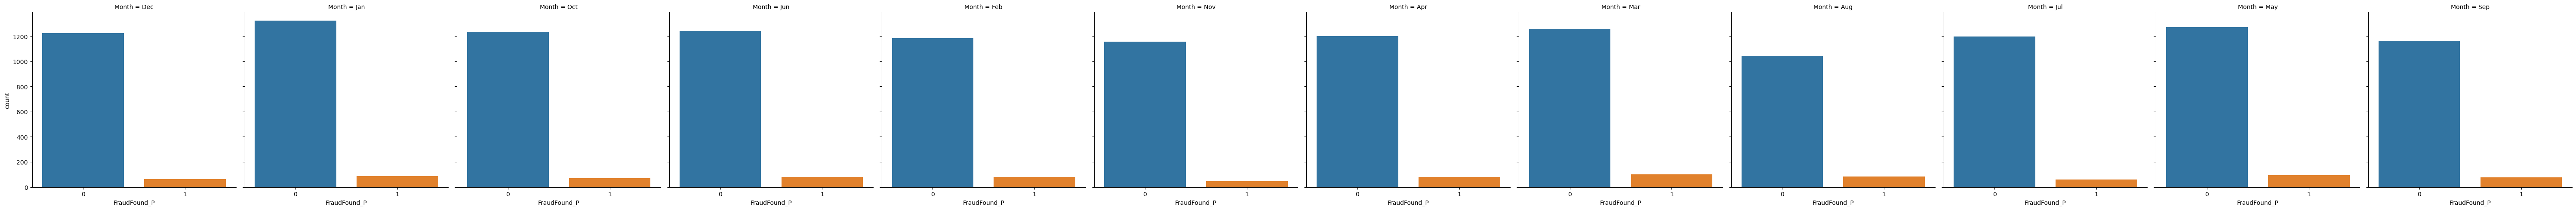

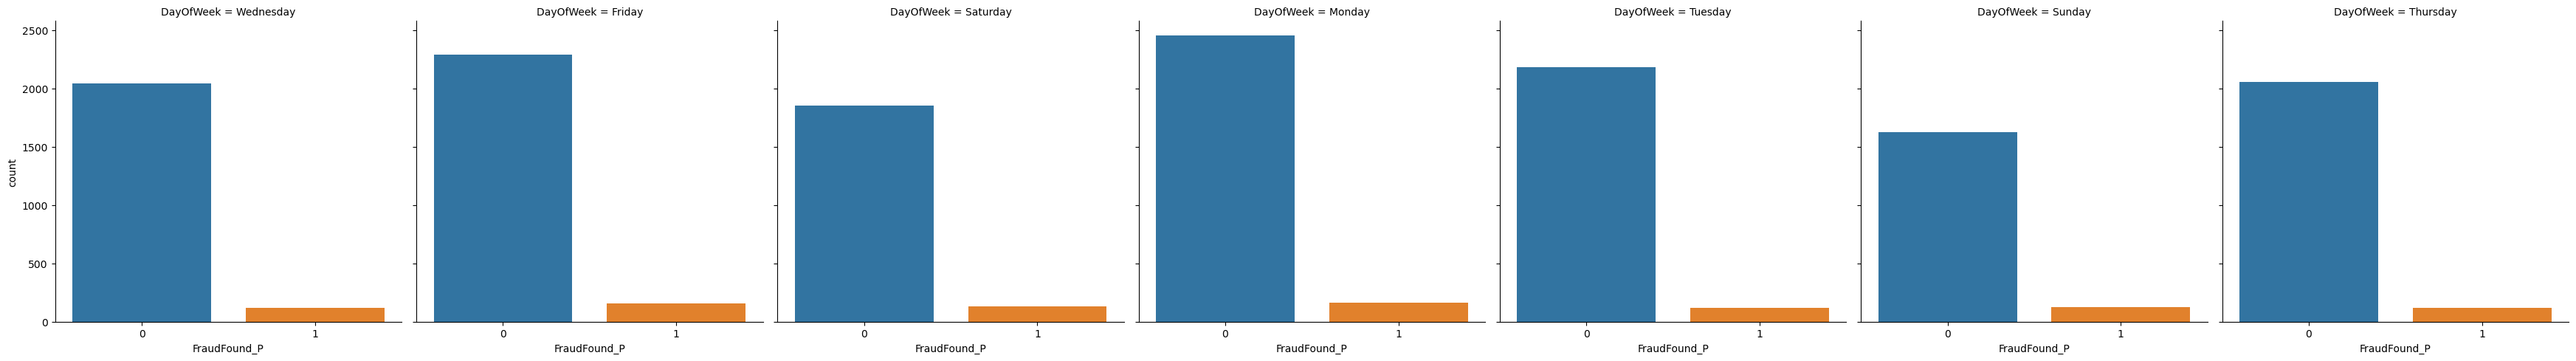

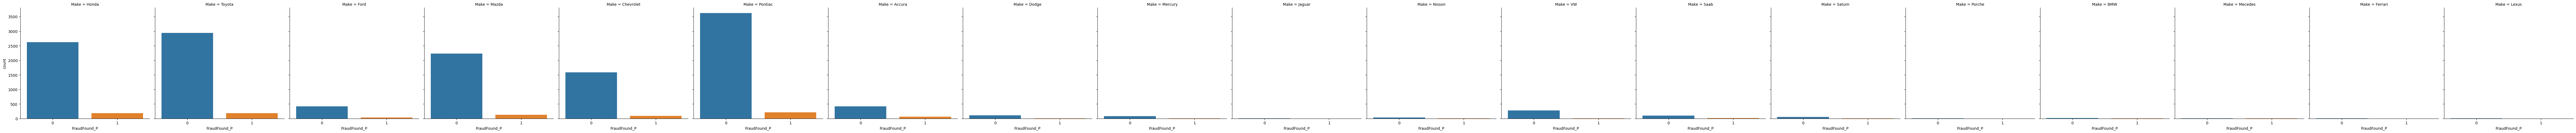

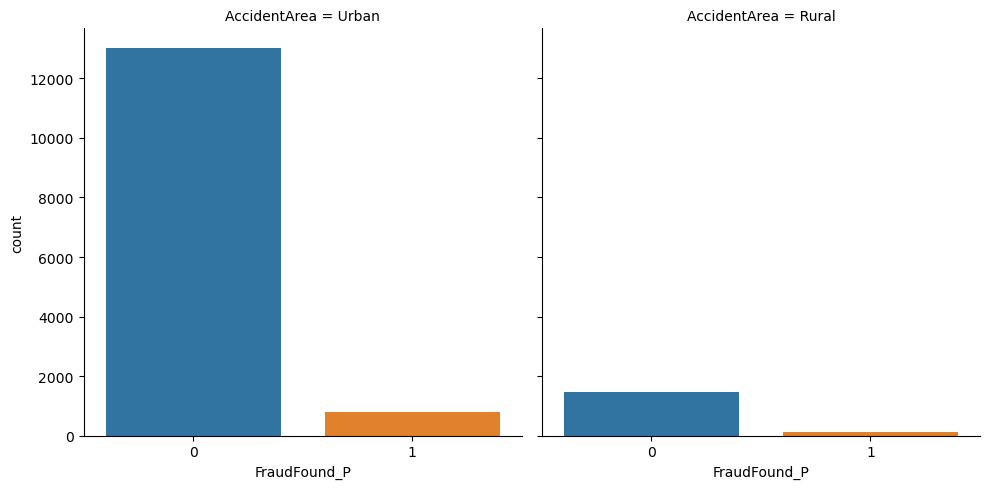

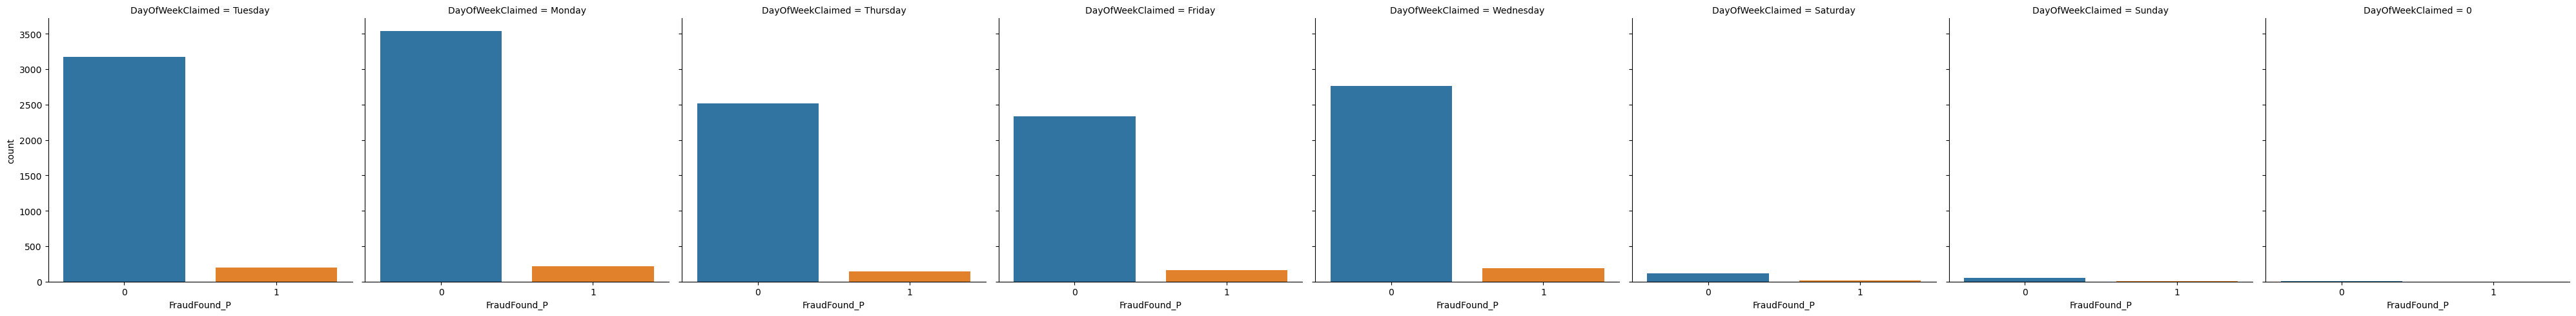

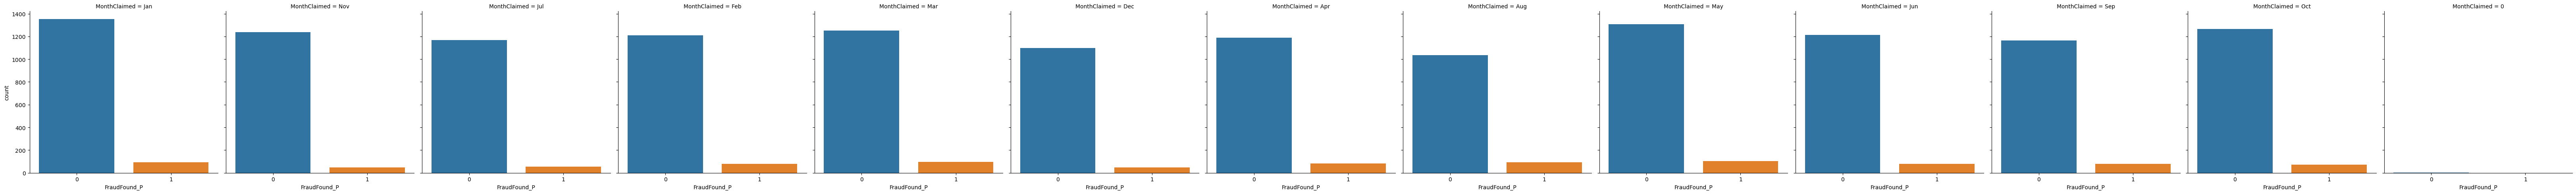

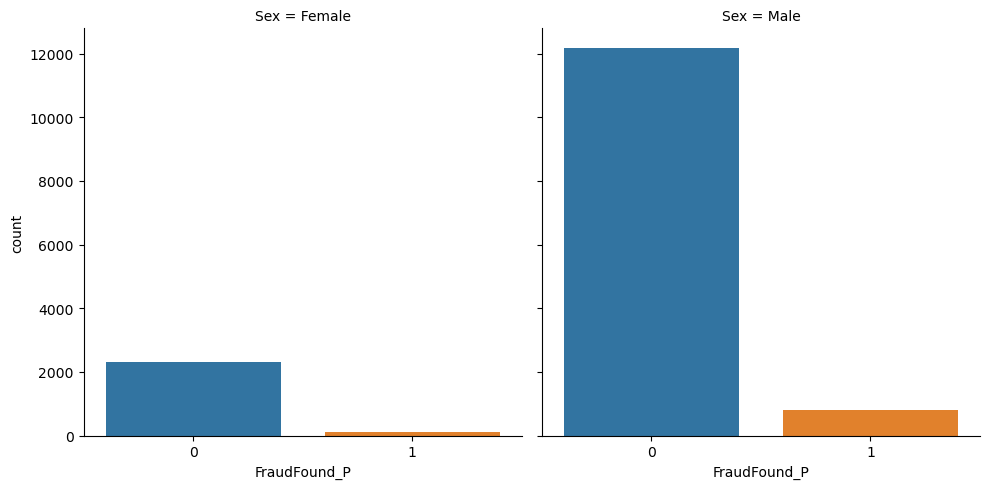

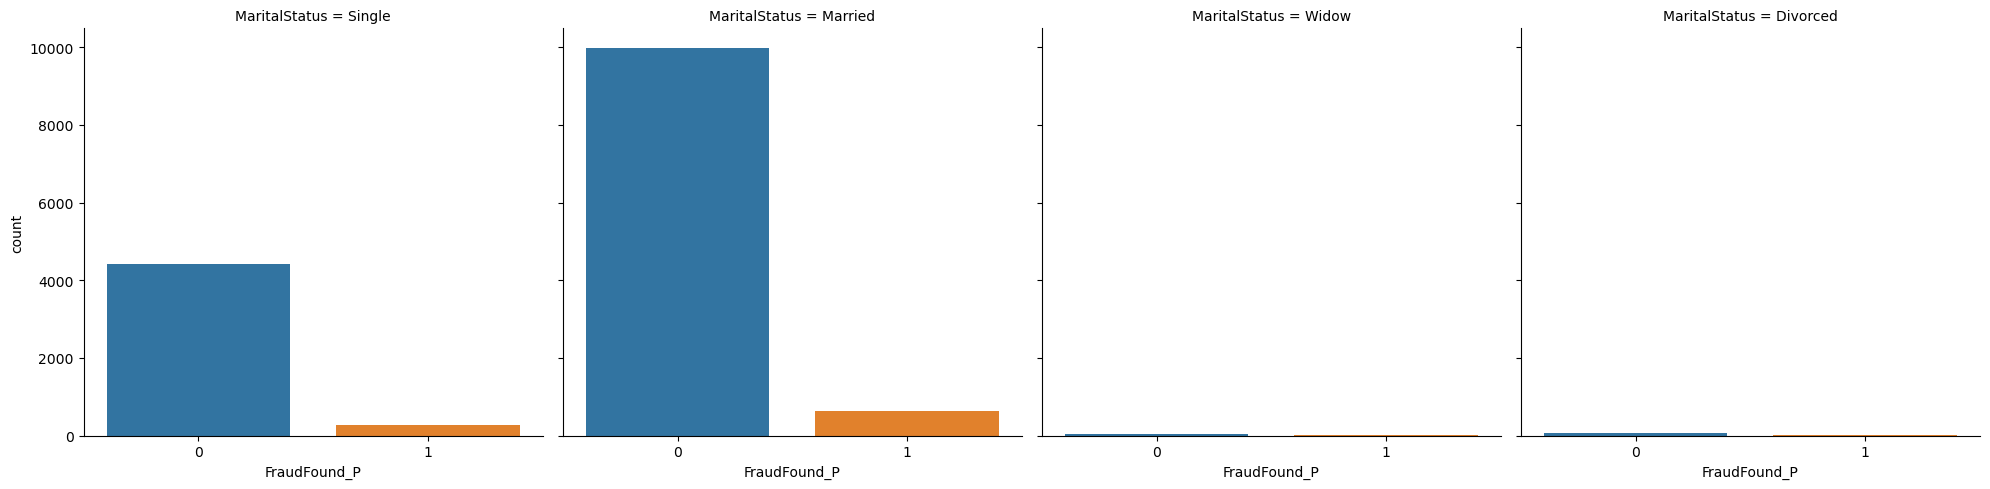

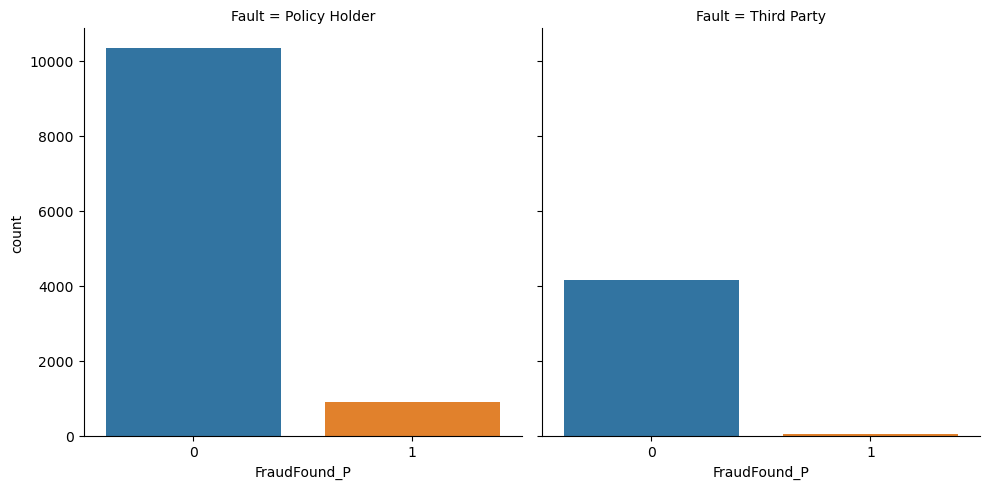

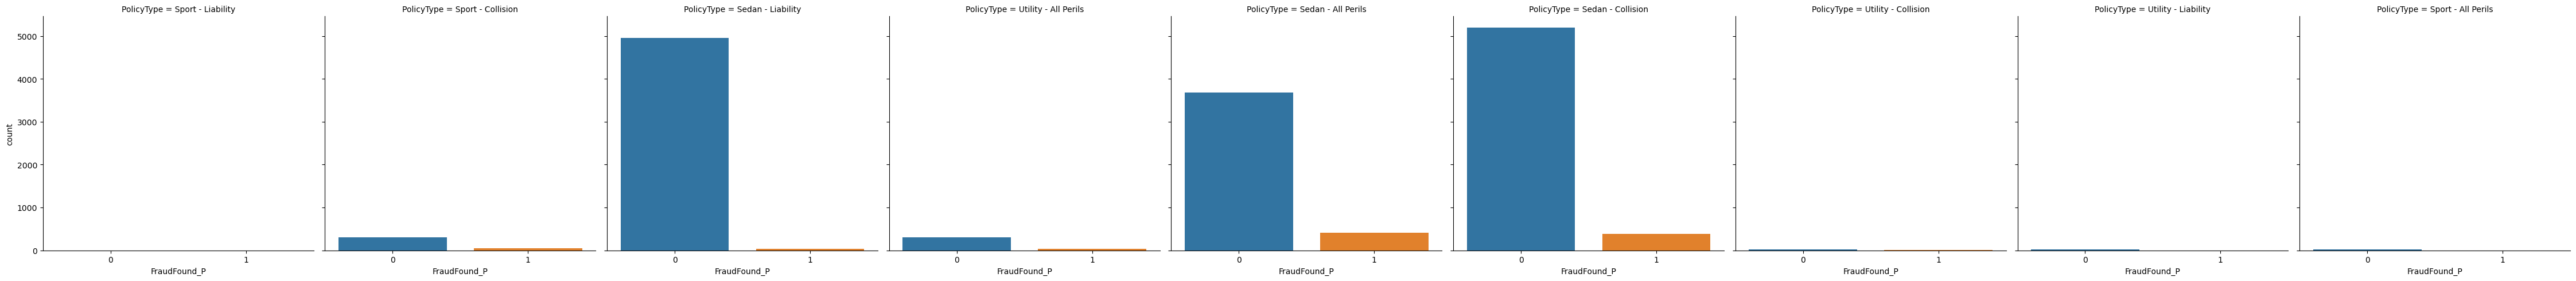

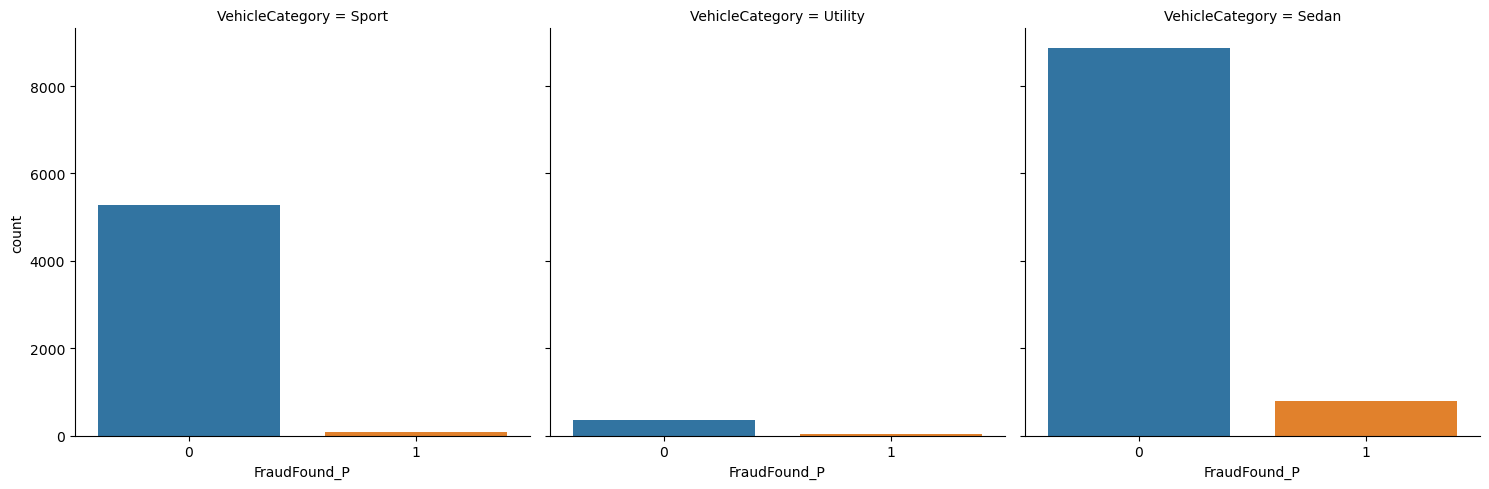

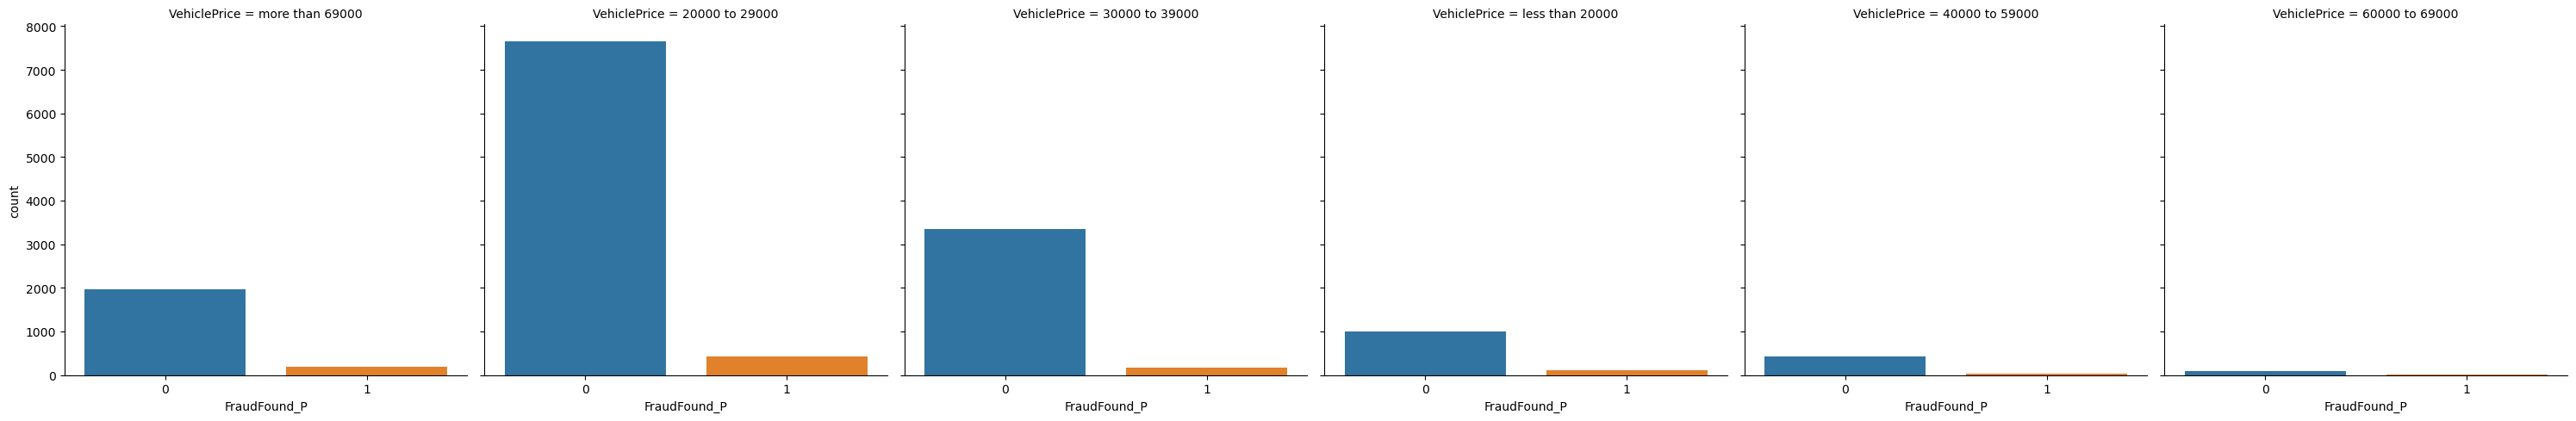

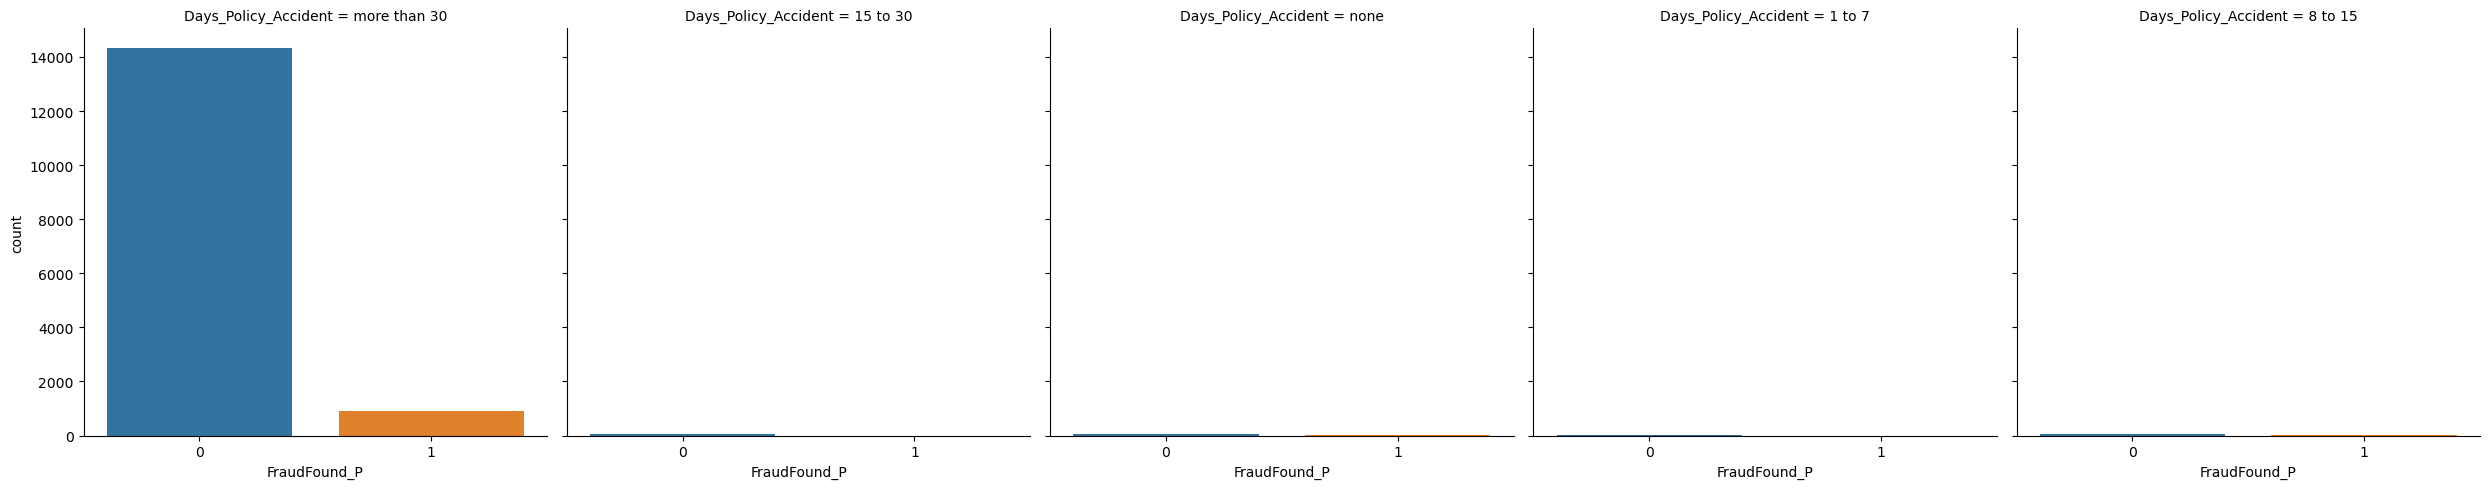

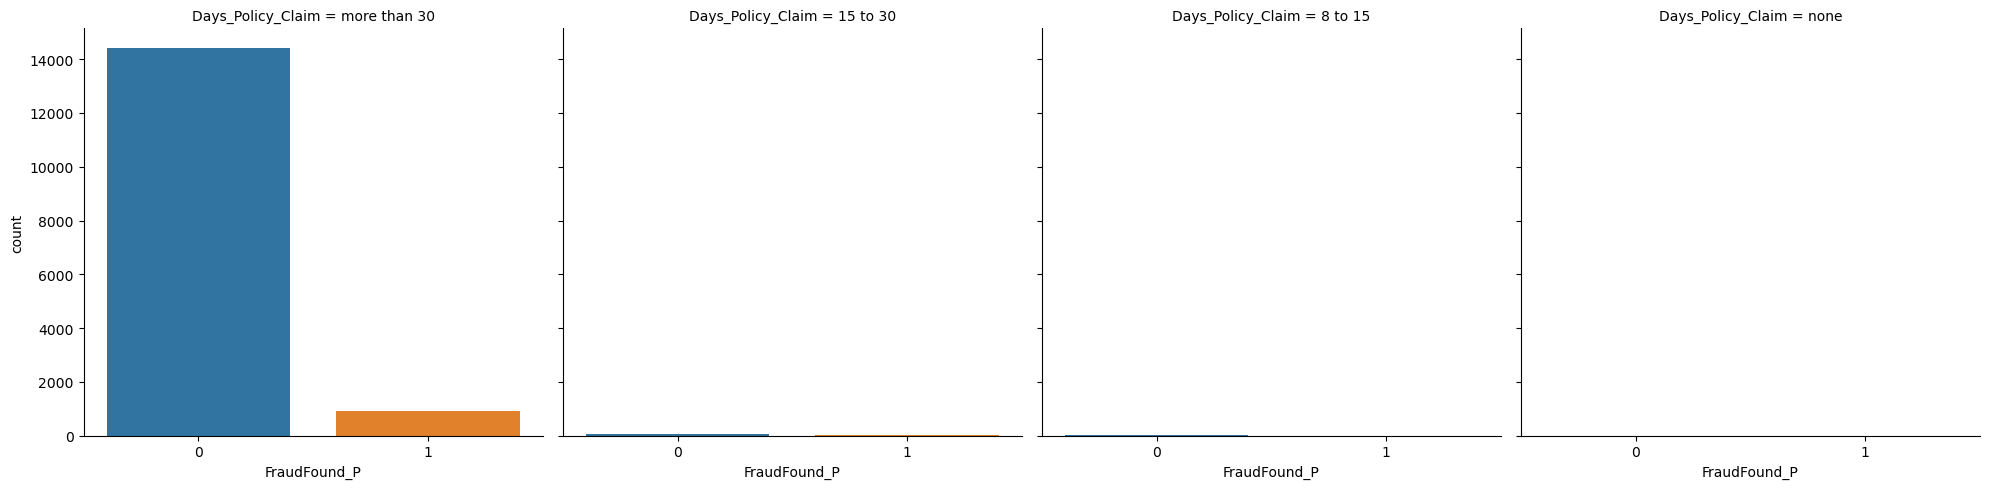

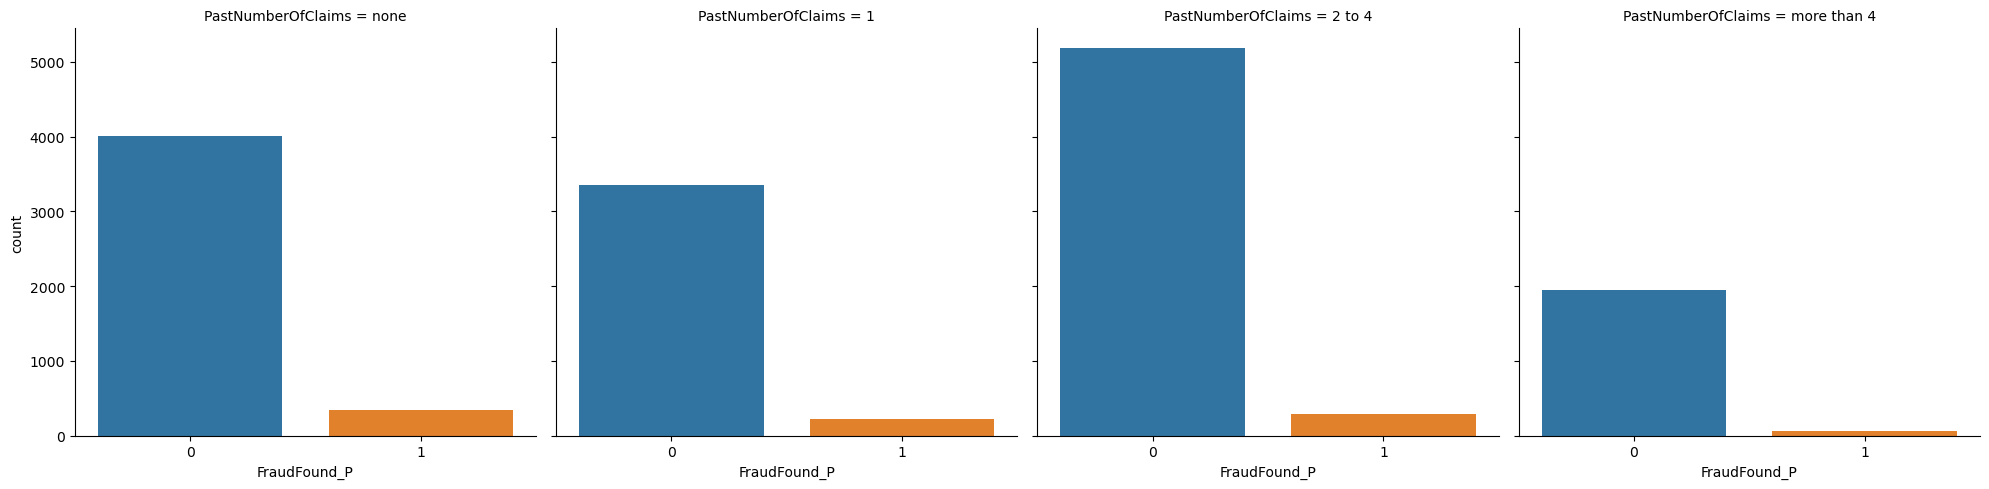

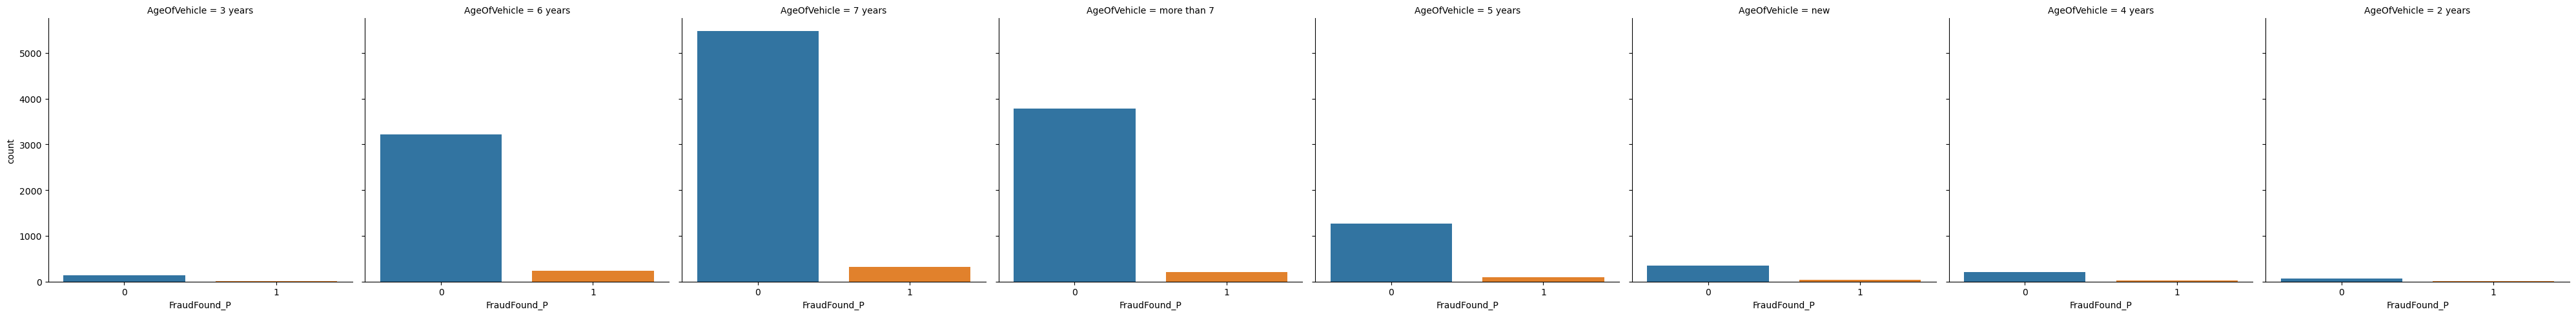

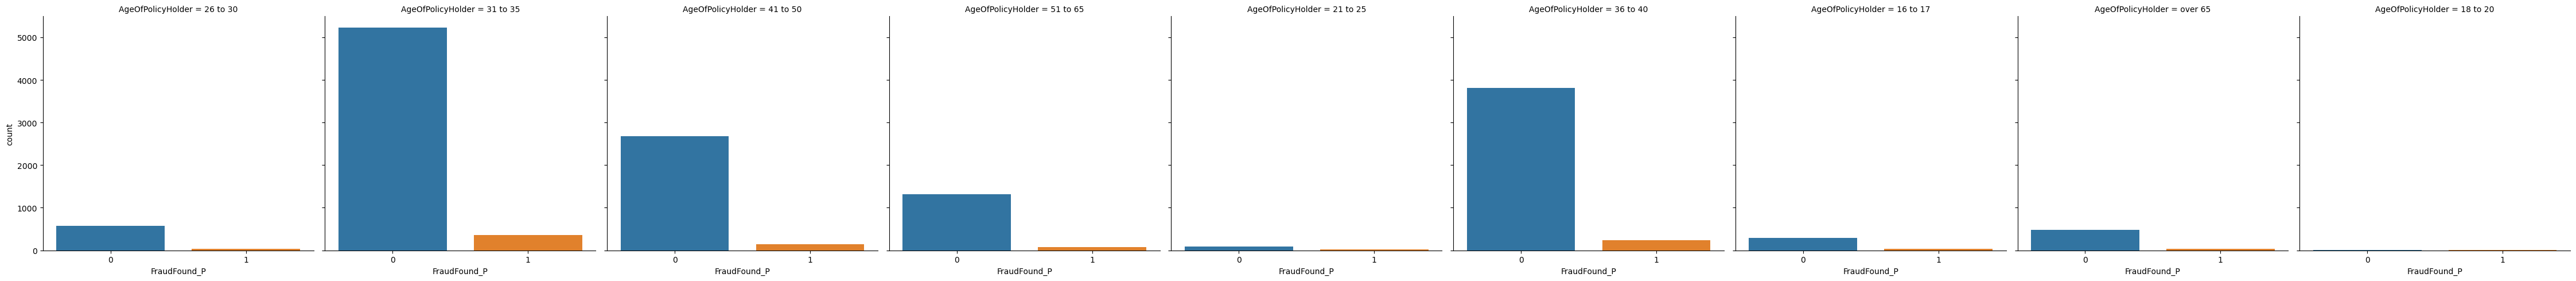

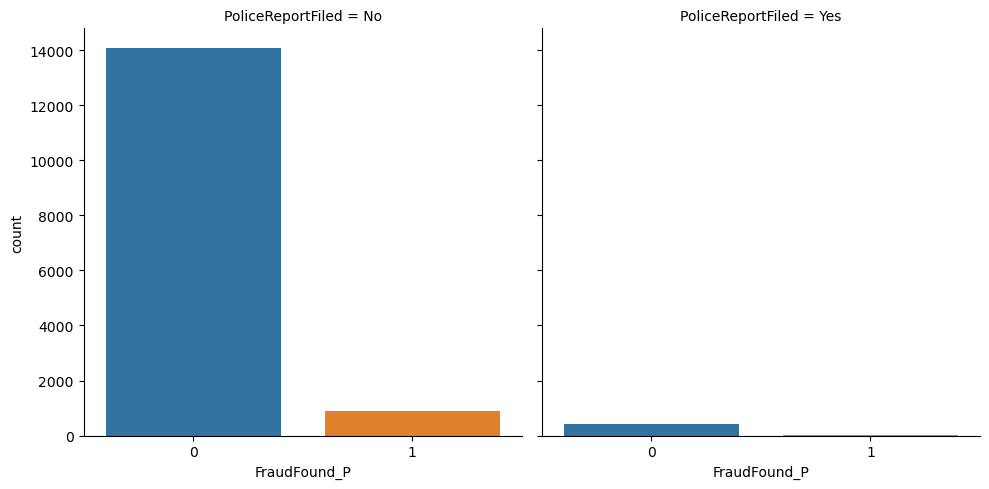

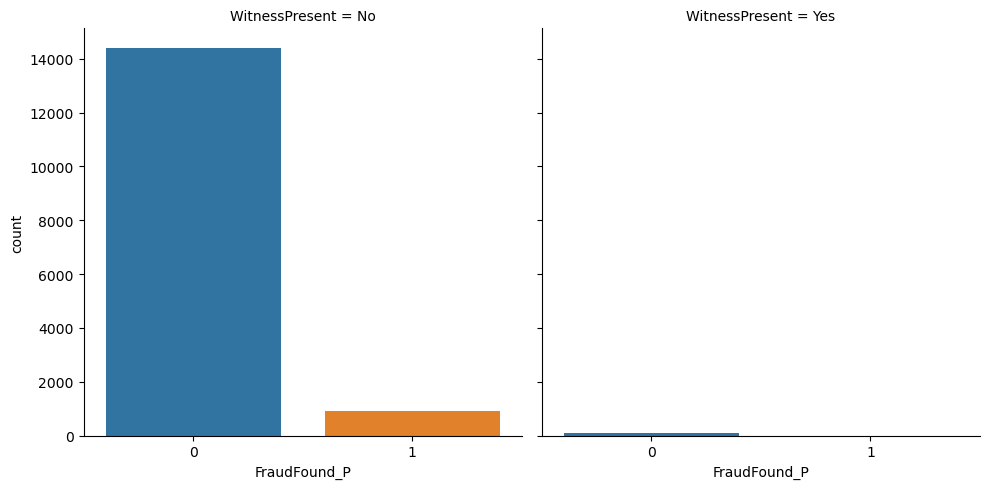

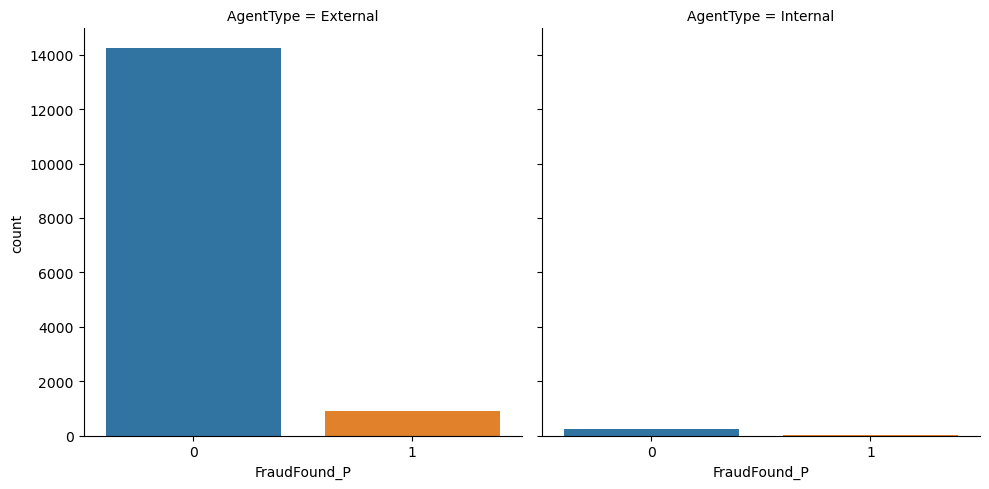

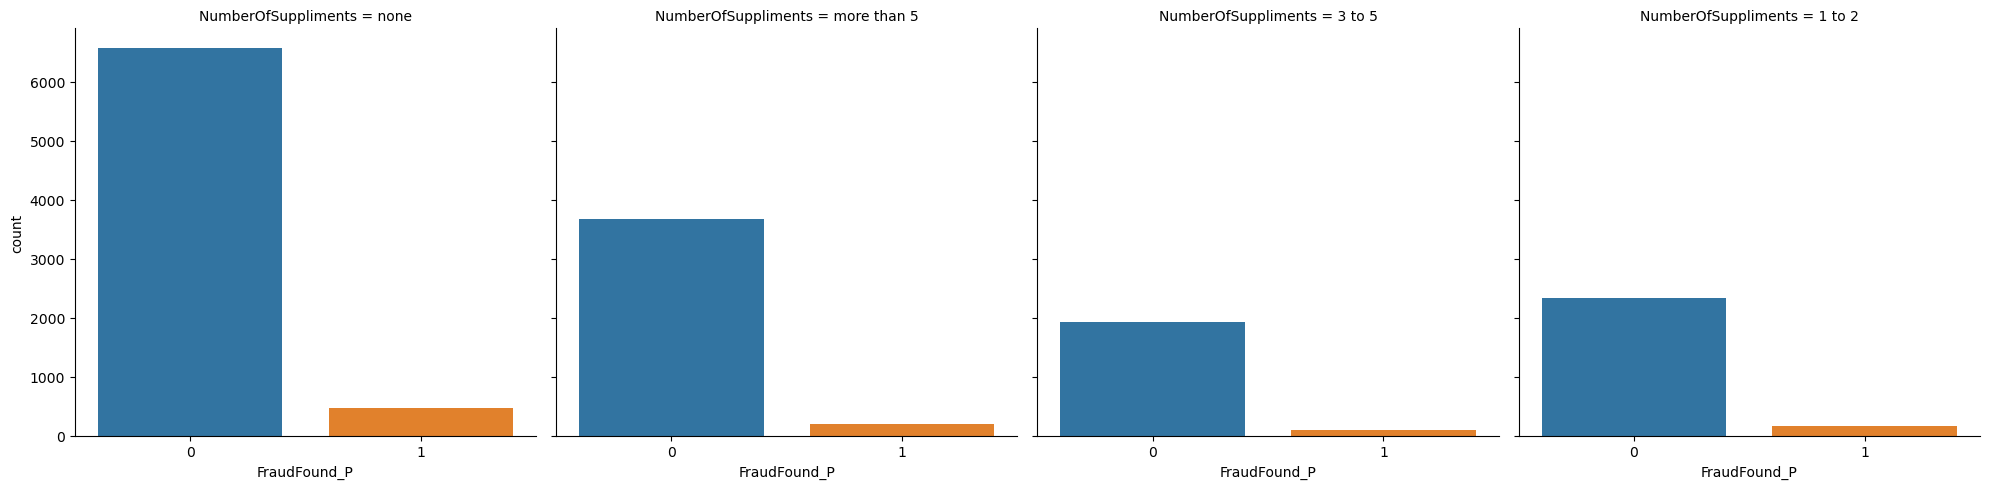

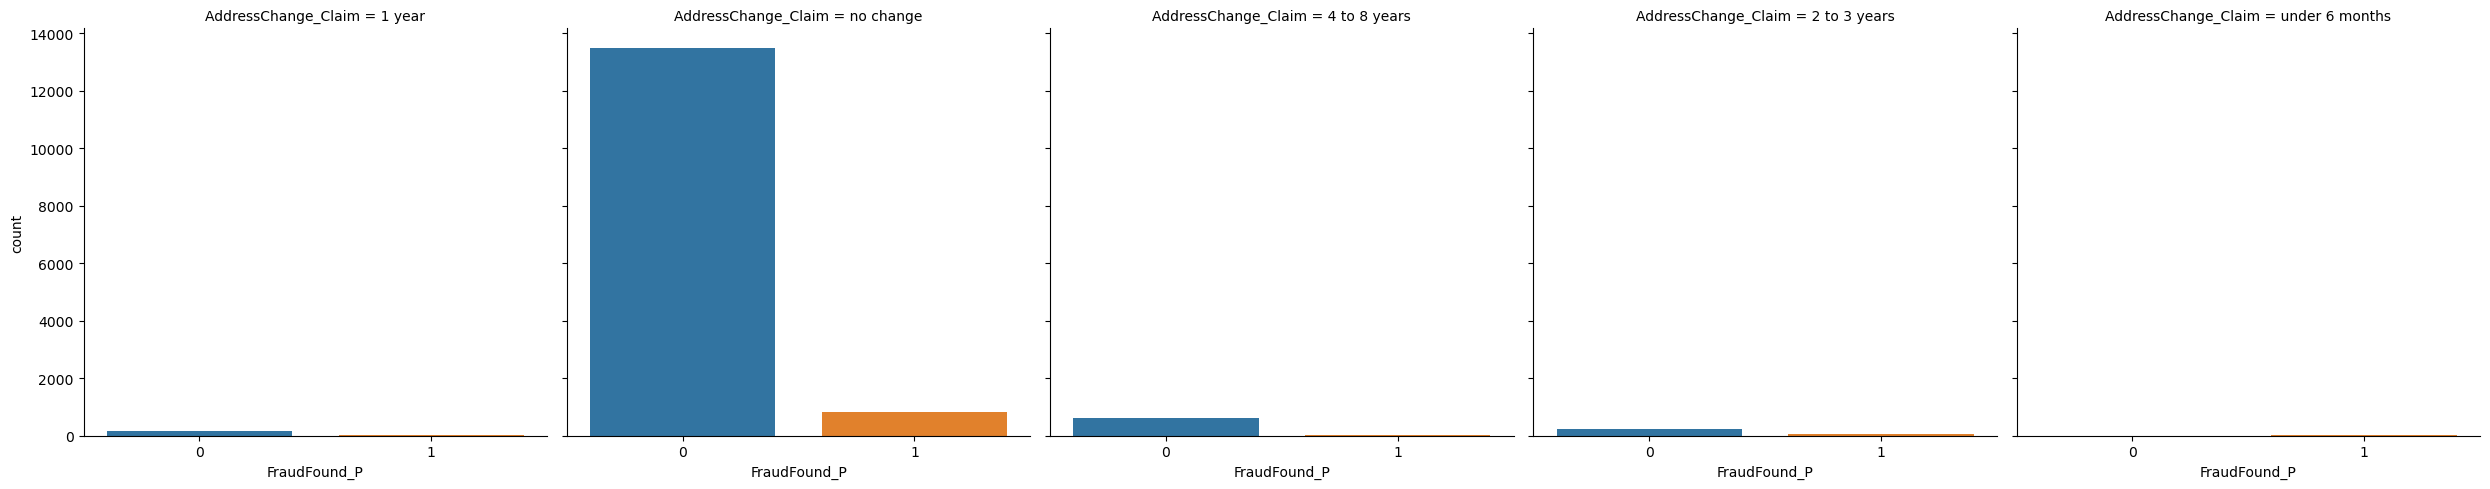

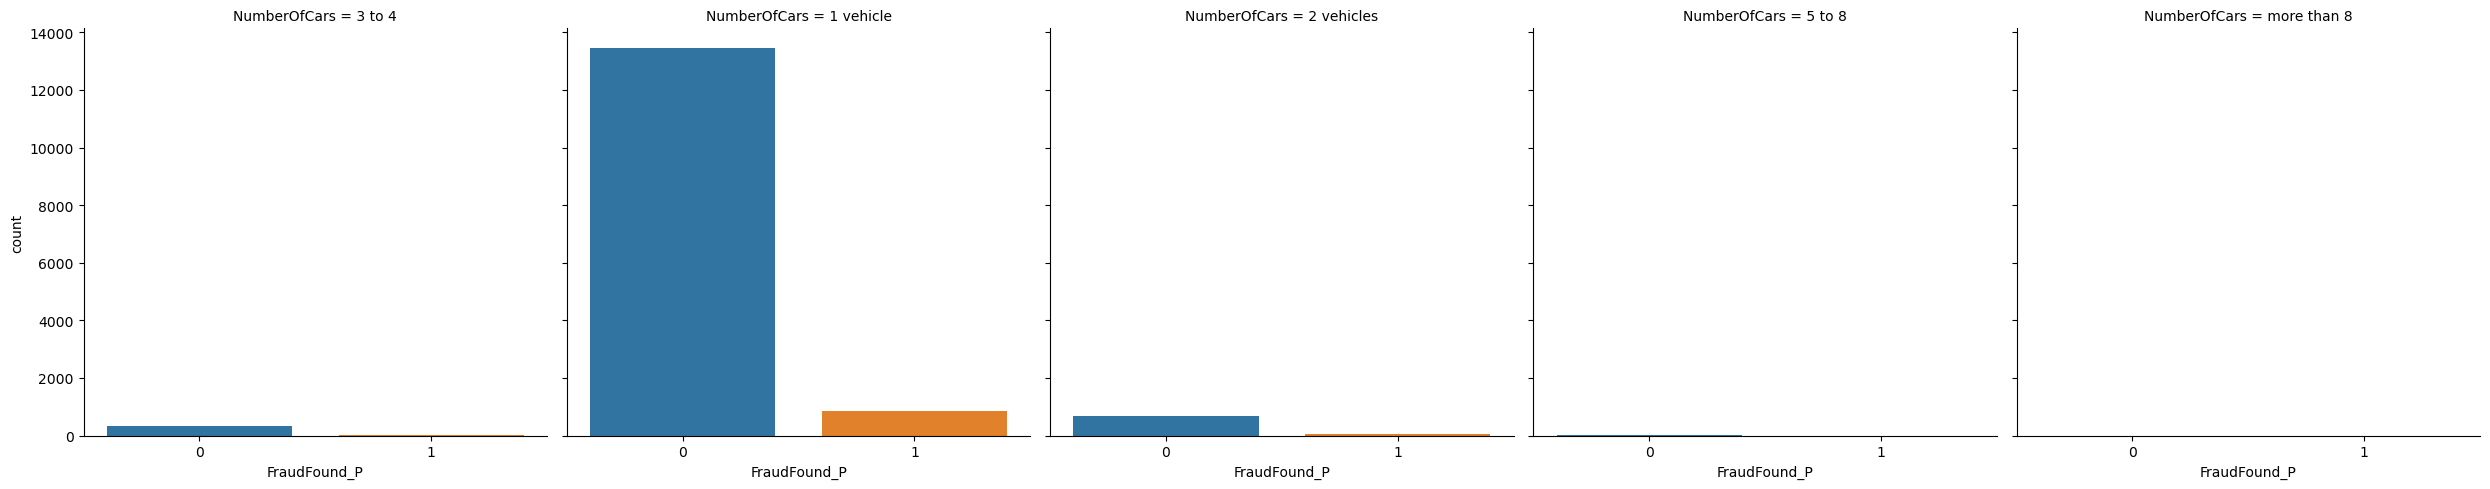

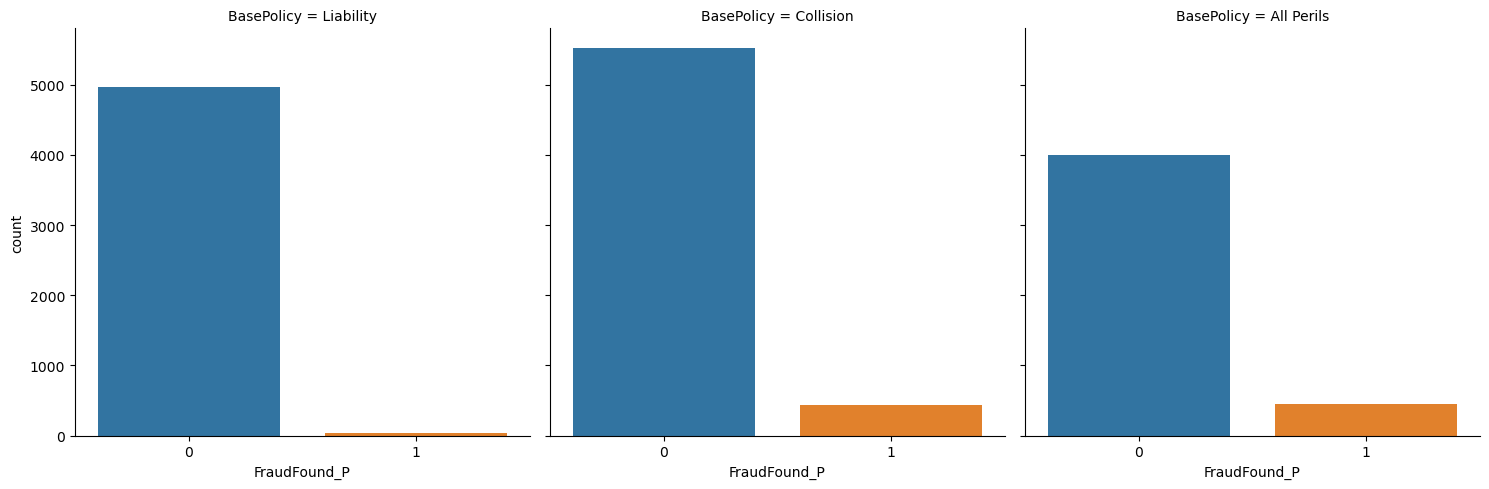

In [18]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='FraudFound_P', col=categorical_feature, kind='count', data= df)
plt.show()

In [19]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['FroudFound_P']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


WeekOfMonth  WeekOfMonthClaimed  Age  FraudFound_P  Deductible  \
0            5                   1   21             0         300   
1            3                   4   34             0         400   
2            5                   2   47             0         400   
3            2                   1   65             0         400   
4            5                   2   27             0         400   

   DriverRating  Year  
0             1  1994  
1             4  1994  
2             3  1994  
3             2  1994  
4             1  1994

In [20]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 6


In [21]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['FroudFound_P']]
print("Continuous feature Count: {}".format(len(continuous_features)))

Continuous feature Count: 1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [23]:
x = df.drop('FraudFound_P',axis=1)
x

Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0              Jan                   1  Female        Single  ...   
1              Jan                   4    Male        Single  ...   
2              Nov                   2    Male       Married  ...   
3              Jul                   1    Male       Married  ...   
4              Feb                   2  Female        Single  ...   
...            ...                 ...     ...           ...  ...   
15415          Nov                   5    Male       Married  ...   
15416          Dec                   1    Male       Married  ...   
15417          Dec                   1    Male        Single  ...   
15418          Dec                   2  Female       Married  ...   
15419          Dec                   3    Male        Single  ...   

       AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled WitnessPresent  \
0           3 years          26 to 30                No             No   
1           6 years          31 to 35               Yes             No   
2           7 years          41 to 50                No             No   
3       more than 7          51 to 65               Yes             No   
4           5 years          31 to 35                No             No   
...             ...               ...               ...            ...   
15415       6 years          31 to 35                No             No   
15416       6 years          31 to 35                No             No   
15417       5 years          26 to 30                No             No   
15418       2 years          31 to 35                No             No   
15419       5 years          26 to 30                No             No   

      AgentType  NumberOfSuppliments  AddressChange_Claim NumberOfCars  Year  \
0      External                 none               1 year       3 to 4  1994   
1      External                 none            no change    1 vehicle  1994   
2      External                 none            no change    1 vehicle  1994   
3      External          more than 5            no change    1 vehicle  1994   
4      External                 none            no change    1 vehicle  1994   
...         ...                  ...                  ...          ...   ...   
15415  External                 none            no change    1 vehicle  1996   
15416  External          more than 5            no change       3 to 4  1996   
15417  External               1 to 2            no change    1 vehicle  1996   
15418  External          more than 5            no change    1 vehicle  1996   
15419  External               1 to 2            no change    1 vehicle  1996   

       BasePolicy  
0       Liability  
1       Collision  
2       Collision  
3       Liability  
4       Collision  
...           ...  
15415   Collision  
15416   Liability  
15417   Collision  
15418  All Perils  
15419   Collision  

[15420 rows x 30 columns]

In [24]:
x.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [25]:
x = x.replace(r'^\s*$', np.nan, regex=True)

In [26]:
x.replace(0,np.nan,inplace=True)
x.replace('Sport - Liability',np.nan,inplace=True)
x.replace('none',np.nan,inplace=True)

In [27]:
x.replace('0',np.nan,inplace=True)
x.isnull().sum()

Month                      0
WeekOfMonth                0
DayOfWeek                  0
Make                       0
AccidentArea               0
DayOfWeekClaimed           1
MonthClaimed               1
WeekOfMonthClaimed         0
Sex                        0
MaritalStatus              0
Age                      320
Fault                      0
PolicyType                 1
VehicleCategory            0
VehiclePrice               0
Deductible                 0
DriverRating               0
Days_Policy_Accident      55
Days_Policy_Claim          1
PastNumberOfClaims      4352
AgeOfVehicle               0
AgeOfPolicyHolder          0
PoliceReportFiled          0
WitnessPresent             0
AgentType                  0
NumberOfSuppliments     7047
AddressChange_Claim        0
NumberOfCars               0
Year                       0
BasePolicy                 0
dtype: int64

6% of data is having class 1
94% of data is having class 0


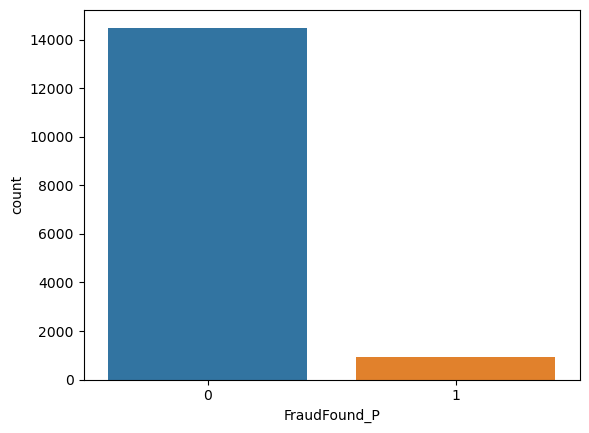

In [28]:
sns.countplot(x= df['FraudFound_P'])
print("{}% of data is having class 1".format(round((len(df[df.FraudFound_P==1])/len(df)*100))))
print("{}% of data is having class 0".format(round((len(df[df.FraudFound_P==0])/len(df)*100))))

In [29]:
imputer = SimpleImputer(strategy='most_frequent')
imputer

SimpleImputer(strategy='most_frequent')

In [30]:
x['DayOfWeekClaimed']=imputer.fit_transform(x[['DayOfWeekClaimed']])
x['MonthClaimed']=imputer.fit_transform(x[['MonthClaimed']])
x['Age']=imputer.fit_transform(x[['Age']])
x['PolicyType']=imputer.fit_transform(x[['PolicyType']])
x['Days_Policy_Accident']=imputer.fit_transform(x[['Days_Policy_Accident']])
x['Days_Policy_Claim']=imputer.fit_transform(x[['Days_Policy_Claim']])
x['PastNumberOfClaims']=imputer.fit_transform(x[['PastNumberOfClaims']])
x['NumberOfSuppliments']=imputer.fit_transform(x[['NumberOfSuppliments']])

c:\Users\ROSY\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [31]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [32]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'],
      dtype='object')

In [33]:
target =df['FraudFound_P']
target = le.fit_transform(target)
target

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [34]:
y = target

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  object 
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  object 
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  object 
 6   MonthClaimed          15420 non-null  object 
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15420 non-null  float64
 11  Fault                 15420 non-null  object 
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15420 non-null  object 
 14  VehiclePrice          15420 non-null  object 
 15  Deductible         

In [37]:
x.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [39]:
transformer1 = ColumnTransformer(
    transformers = 
[('tnf2',OneHotEncoder(sparse = False ,
    drop ='first'),[0,2,3,4,5,6,8,
    9,10,11,12,13,14,17,18,19,20,21,22,
    23,24,25,26,27,29])],
    remainder = 'passthrough')
transformer1

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf2',
                                 OneHotEncoder(drop='first', sparse=False),
                                 [0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14,
                                  17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
                                  29])])

In [40]:
transformer2 = LogisticRegression()
transformer2

LogisticRegression()

In [41]:
pipe = Pipeline([
    ('transformer1',transformer1),
    
    ('transformer2',transformer2)
    ])
pipe

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 2, 3, 4, 5, 6, 8, 9, 10,
                                                   11, 12, 13, 14, 17, 18, 19,
                                                   20, 21, 22, 23, 24, 25, 26,
                                                   27, 29])])),
                ('transformer2', LogisticRegression())])

In [42]:
pipe.fit(x_train,y_train)

c:\Users\ROSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 2, 3, 4, 5, 6, 8, 9, 10,
                                                   11, 12, 13, 14, 17, 18, 19,
                                                   20, 21, 22, 23, 24, 25, 26,
                                                   27, 29])])),
                ('transformer2', LogisticRegression())])

In [43]:
y_pred = pipe.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
accuracy_score(y_test,y_pred)

0.9406614785992218

In [45]:
#f1_score(y_test,y_pred)

In [46]:
model2 = RandomForestClassifier()
pipe1 = Pipeline([
    ('transformer1',transformer1),
    
    ('model2',model2)
    ])
pipe1

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 2, 3, 4, 5, 6, 8, 9, 10,
                                                   11, 12, 13, 14, 17, 18, 19,
                                                   20, 21, 22, 23, 24, 25, 26,
                                                   27, 29])])),
                ('model2', RandomForestClassifier())])

In [47]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 2, 3, 4, 5, 6, 8, 9, 10,
                                                   11, 12, 13, 14, 17, 18, 19,
                                                   20, 21, 22, 23, 24, 25, 26,
                                                   27, 29])])),
                ('model2', RandomForestClassifier())])

In [48]:
y_pred1 = pipe1.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
accuracy_score(y_test,y_pred1)

0.9416342412451362

In [50]:
pipe1.score(x_test,y_test)

0.9416342412451362

In [51]:
model3 =DecisionTreeClassifier()

In [52]:
pipe2 = Pipeline([
    ('transformer1',transformer1),
    
    ('model3',model3)
    ])
pipe2

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 2, 3, 4, 5, 6, 8, 9, 10,
                                                   11, 12, 13, 14, 17, 18, 19,
                                                   20, 21, 22, 23, 24, 25, 26,
                                                   27, 29])])),
                ('model3', DecisionTreeClassifier())])

In [53]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 2, 3, 4, 5, 6, 8, 9, 10,
                                                   11, 12, 13, 14, 17, 18, 19,
                                                   20, 21, 22, 23, 24, 25, 26,
                                                   27, 29])])),
                ('model3', DecisionTreeClassifier())])

In [54]:
y_pred2 = pipe2.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
accuracy_score(y_test,y_pred2)

0.9036964980544747

In [56]:
from xgboost import XGBClassifier

In [57]:
model4 = XGBClassifier()

In [58]:
pipe3 = Pipeline([
    ('transformer1',transformer1),
    
    ('model4',model4)
    ])
pipe3

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 2, 3, 4, 5, 6, 8, 9, 10,
                                                   11, 12, 13, 14, 17, 18, 19,
                                                   20, 21, 22, 23, 24, 25, 26,
                                                   27, 29])])),
                ('model4',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_po

In [59]:
pipe3.fit(x_train,y_train)

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 2, 3, 4, 5, 6, 8, 9, 10,
                                                   11, 12, 13, 14, 17, 18, 19,
                                                   20, 21, 22, 23, 24, 25, 26,
                                                   27, 29])])),
                ('model4',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_po

In [60]:
y_pred3 = pipe3.predict(x_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
accuracy_score(y_test,y_pred3)

0.9416342412451362

In [62]:
from sklearn.metrics import confusion_matrix

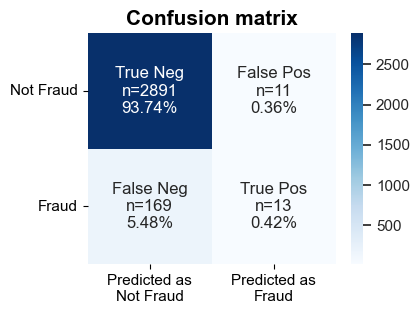

In [63]:

#confusion matrix
predictions = pipe3.predict(x_test)
cf_matrix = confusion_matrix(y_test, predictions)


#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(4,3))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);


In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

C:\Users\ROSY\AppData\Local\Temp\ipykernel_9332\1756996278.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
C:\Users\ROSY\AppData\Local\Temp\ipykernel_9332\1756996278.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
C:\Users\ROSY\AppData\Local\Temp\ipykernel_9332\1756996278.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
C:\Users\ROSY\AppData\Local\Temp\ipykernel_9332\1756996278.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

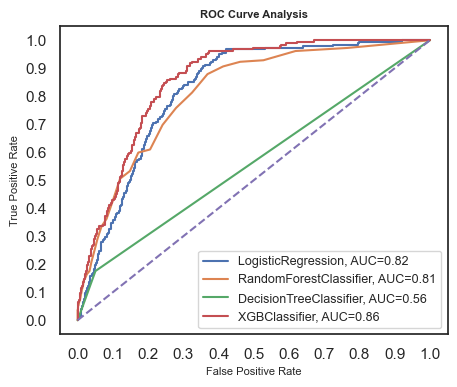

In [65]:
# Instantiate the classfiers and make a list
classifiers_name = [pipe,
                   pipe1, pipe2,
                   pipe3
                  ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers_name:
    yproba = cls.predict_proba(x_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table['names'] = ['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier','XGBClassifier']
result_table.set_index('names', inplace=True)

#Plot the figure
fig = plt.figure(figsize=(5,4))

sns.set_style("white")

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='m', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=8)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=8)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=8)
plt.legend(prop={'size':9}, loc='lower right')

plt.show()


In [66]:
#pip install lazypredict

In [68]:
# check scores of Classification models

# import lazypredict library 
from lazypredict.Supervised import LazyClassifier

# define the lazypredict classifier with the parameters
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

## save the model with resetted index
models = models.reset_index()

# print the models and their scores
print(models)

100%|██████████| 29/29 [02:13<00:00,  4.59s/it]

                            Model  Accuracy  Balanced Accuracy  ROC AUC  \
0                      GaussianNB      0.55               0.74     0.74   
1                     BernoulliNB      0.88               0.61     0.61   
2          DecisionTreeClassifier      0.90               0.57     0.57   
3             ExtraTreeClassifier      0.90               0.55     0.55   
4               BaggingClassifier      0.94               0.54     0.54   
5                  LabelSpreading      0.90               0.53     0.53   
6                LabelPropagation      0.90               0.53     0.53   
7                      Perceptron      0.93               0.53     0.53   
8                   XGBClassifier      0.94               0.52     0.52   
9                  LGBMClassifier      0.94               0.52     0.52   
10           ExtraTreesClassifier      0.94               0.52     0.52   
11     LinearDiscriminantAnalysis      0.94               0.52     0.52   
12         CalibratedClas

In [ ]:
len(x_train)


12336

In [ ]:
len(x_test)

3084